# BATUHAN DEDEOƒûLU

## Calculating the output in DZD systems given the difference equation
### Calculating the output sign without using defined commands

In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [14]:
# x ve y nin ilk elemanlarƒ± 0 √ß√ºnk√º √∂n ko≈üul olarak y[-1]=x[-1]=0 diyoruz
x=[0,1,-1,0,0]
y=[0] 

In [15]:
#d√∂ng√ºn√ºn 1 den ba≈ülamasƒ±nƒ±n nedeni x'in 1. deƒüeri aslƒ±nda indis vekt√∂r√ºnde n=0 a denk gelmekte
for i in range (1,len(x)):
    y.append (-0.5*y[i-1]+x[i]+2*x[i-1])
    
#append komutu ile y'nin sonuna her d√∂ng√ºde bulunan deƒüeri ekledik
    


In [16]:
print(y)

[0, 1.0, 0.5, -2.25, 1.125]


In [17]:
#y dizisinin uzunluƒüu n indisine g√∂re belirliyoruz, her d√∂ng√ºde i√ßerideki elamƒ± deƒüi≈ütirmi≈ü oluyoruz.
x=np.array([0,1,-1,0,0], dtype=float)
y=np.array([0,0,0,0,0], dtype=float)
for i in range(1,len(x)):
    y[i]=-0.5*y[i-1]+x[i]+2*x[i-1]
print(y)

[ 0.     1.     0.5   -2.25   1.125]


### Calculating the output sign  using defined commands

In [6]:
from scipy import signal as sig

In [7]:
x=np.array([0,1,-1,0,0],dtype=float)

In [8]:
b=[1,2]    #b vekt√∂r√ºn giri≈ü i≈üaretinin (x[]) deƒüerleri
a=[1,0.5]  #a vekt√∂r√ºn √ßƒ±kƒ±≈ü i≈üaretinin (y[]) deƒüerleri

In [9]:
y=sig.lfilter(b,a,x) #x giri≈üe uygulanan tekboyutlu dizimiz
print(y)

[ 0.     1.     0.5   -2.25   1.125]


In [10]:
n=np.arange(-1,4)  #n=-1,0,1,2,3

<IPython.core.display.Javascript object>


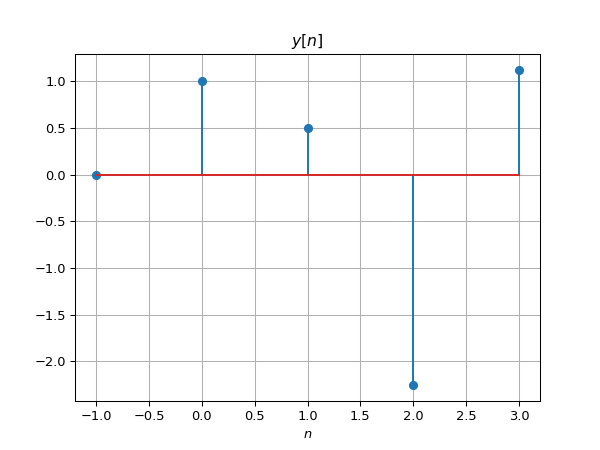

In [12]:
plt.stem(n,y,use_line_collection= True )
plt.title('$y[n]$')
plt.xlabel('$n$')
plt.grid()

## Calculating the output of a system whose impulse response is known

###  Calculating the convolution without using defined commands

In [18]:
import numpy as np
#x ve h ƒ±n konvol√ºsyon toplamƒ± ile y i≈üaretimizi bulalƒ±m

In [19]:
h=np.array([1,2,-1],dtype=float)
x=np.array([1,3], dtype=float)

In [20]:
# x ve h dizilerinin uzunluklarƒ±nƒ± tuttuk
M=len(h) 
N=len(x)
L=M+N-1
y=np.zeros([L]) 


In [21]:
for n in range (L):
    y[n]=0
    for k in range(N):     #program hata vermemesi i√ßin n-k nƒ±n negatif ve M den b√ºy√ºk deƒüerleri i√ßin 0 a e≈üitledik
        if n-k<0 or n-k>=M: 
            h_n_k=0
        else: 
            h_n_k = h[n-k]
        y[n]=y[n]+x[k]*h_n_k
print(y)

[ 1.  5.  5. -3.]


###  Calculating the convolution using defined commands

In [22]:
import numpy as np
from scipy import signal as sig

In [23]:
h=np.array([1,2,-1],dtype=float)
x=np.array([1,3],dtype=float)

In [24]:
# concolve komutu ile otomatik olarak hesaplanabilir
print(np.convolve(x,h)) 
print(sig.convolve(x,h))

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


In [25]:
x=np.array([1,0,2,-1])
h=np.array([1,0,0,0,3])
y=np.convolve(x,h)
print(y)

[ 1  0  2 -1  3  0  6 -3]


<IPython.core.display.Javascript object>


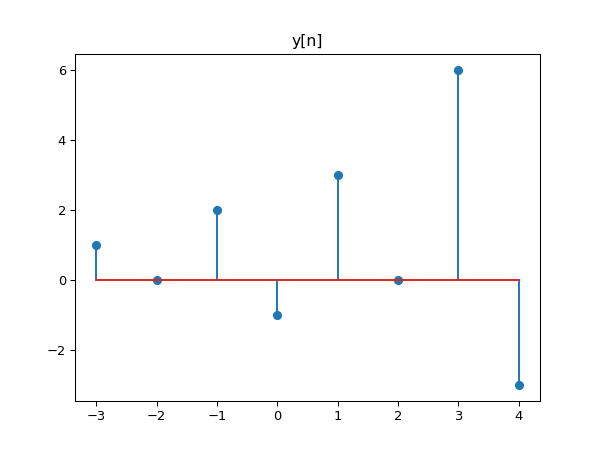

In [26]:
n=np.arange(-3,5) # ba≈ülangƒ±√ß ve biti≈ü i≈üaretlerinin ayrƒ± ayrƒ± konvol√ºsyonlarƒ±nƒ± aldƒ±k
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.title('y[n]')
plt.show()

## EXAMPLES:

## 1)

#### a-≈üƒ±kkƒ±)

In [27]:
# Sistemin d√ºrt√º cevabƒ±nƒ± bulmak i√ßin x[n]=ùõø[n] dersek sistem √ßƒ±ktƒ±mƒ±z y[n]=h[n] ≈üeklinde yani d√ºrt√º cevabƒ± olur
# y[n]=x[n]-x[n-1] sisteminde yukarƒ±daki deƒüerlerimizi yerine koyarsak
# h[n]=ùõø[n]-ùõø[n-1] olarak d√ºrt√º cevabƒ±nƒ± bulmu≈ü olduk

#### b-≈üƒ±kkƒ±) bu sistem kararlƒ±dƒ±r √ß√ºnk√º

In [28]:
#‚à£x[n]‚à£<M dersek kararlƒ± olabilmesi i√ßin ‚à£y[n]‚à£<N olmasƒ± gerekmektedir
#‚à£x[n]‚à£<M olduƒüundan ‚à£x[n]-x[n-1]‚à£<M ƒ±-olarak kabul edilebilir dolayƒ±sƒ±yla
#‚à£y[n]‚à£=‚à£x[n]-x[n-1]‚à£<M sƒ±nƒ±rlƒ± bir y i≈üareti olduƒüunu kanƒ±tladƒ±k. Sistemimiz kararlƒ±dƒ±r
#ya da kararlƒ±lƒ±ƒüƒ± d√ºrt√º cevabƒ±ndan incelersek;
#h[n] deƒüerimizin genliƒüinin sabit olduƒüu h[n]=ùõø[n]-ùõø[n-1] ≈üekildeki gibi bellidir dolayƒ±sƒ±yla kararlƒ±dƒ±r diyebiliriz.


#### c-≈üƒ±kkƒ±)

In [29]:
import numpy as np
from scipy import signal as sig


In [30]:
n=np.arange(0,21)
h=np.array([1,-1],dtype=float)
x=np.zeros(len(n),dtype=float)

for i in range (len(n)):                            # iki periyot olacak ≈üekilde x i≈üaretimizi √ßizdirdik periyodunu N=10 bulduk.
    x[i]=np.cos(np.pi*i/5)
    



[ 1.         -0.19098301 -0.5        -0.61803399 -0.5        -0.19098301
  0.19098301  0.5         0.61803399  0.5         0.19098301 -0.19098301
 -0.5        -0.61803399 -0.5        -0.19098301  0.19098301  0.5
  0.61803399  0.5         0.19098301]


<IPython.core.display.Javascript object>


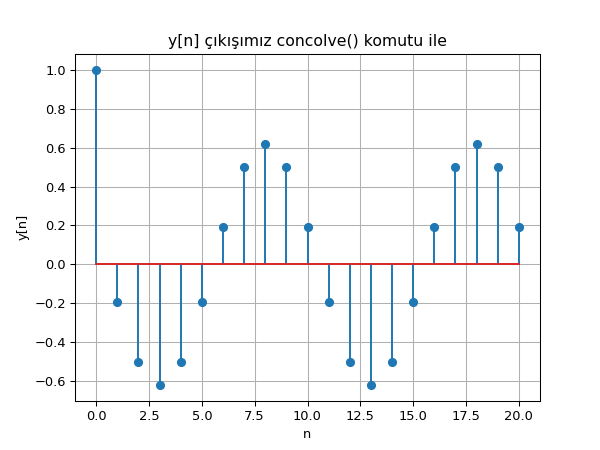

In [31]:
y=np.convolve(x,h,'same')                           #convolve() komutu ile sistem √ßƒ±ktƒ±mƒ±zƒ± bulduk
print(y)
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.grid()
plt.title('y[n] √ßƒ±kƒ±≈üƒ±mƒ±z concolve() komutu ile')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()

<IPython.core.display.Javascript object>


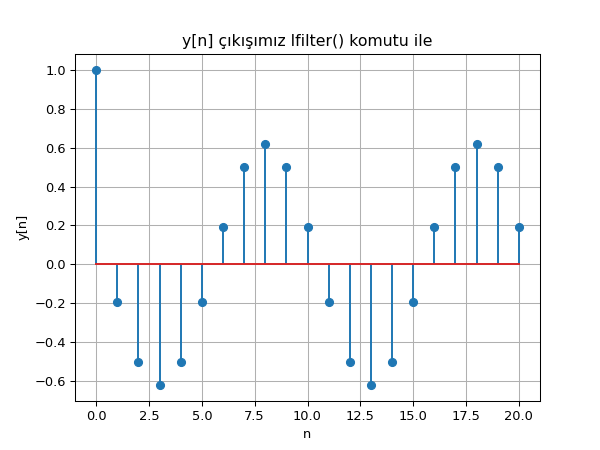

[ 1.         -0.19098301 -0.5        -0.61803399 -0.5        -0.19098301
  0.19098301  0.5         0.61803399  0.5         0.19098301 -0.19098301
 -0.5        -0.61803399 -0.5        -0.19098301  0.19098301  0.5
  0.61803399  0.5         0.19098301]


In [32]:

plt.figure()
b=[1,-1]
a=[1]
y1=sig.lfilter(b,a,x)                              #lfilter() komutu ile sistem √ßƒ±ktƒ±mƒ±zƒ± bulduk
print(y1)
plt.stem(n,y1,use_line_collection=True)
plt.grid()
plt.title('y[n] √ßƒ±kƒ±≈üƒ±mƒ±z lfilter() komutu ile')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()


## 2)


### a-≈üƒ±kkƒ±)

<IPython.core.display.Javascript object>


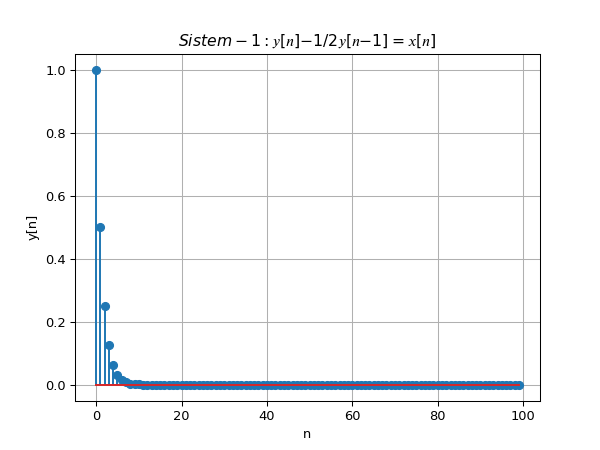

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

def u(n):               
    if n >= 0:
        return 1
    else:
        return 0
    
n=np.arange(0,100)
h=np.zeros(len(n),dtype=float)
x=np.zeros(len(n),dtype=float) # 100 birim olacak ≈üekilde x e yer ayƒ±rdƒ±k

for i in range(len(n)): 
    x = u(i)


for i in range (len(n)):                           
    h[i]=2**-i


y=np.convolve(x,h,'same')                        
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.grid()
plt.title('$Sistem-1: ùë¶[ùëõ] ‚àí1/2ùë¶[ùëõ ‚àí 1] = ùë•[ùëõ]$')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()

<IPython.core.display.Javascript object>


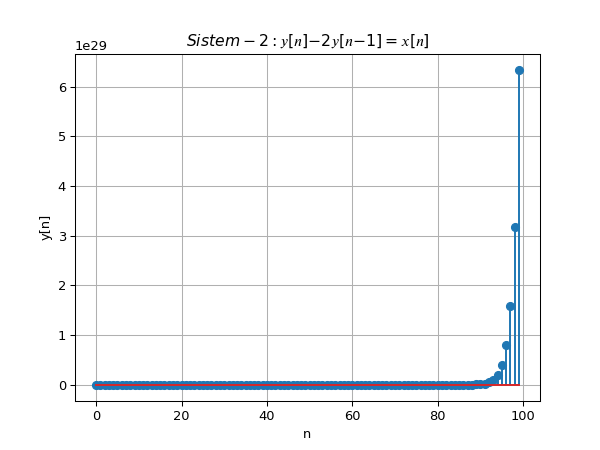

In [39]:

for i in range(len(n)): # x giri≈üimizi 100 adet d√ºrt√º fonksiyonu olarak belirledik
    x = u(i)


for i in range (len(n)):      # el ile d√ºrt√º cevabƒ±nƒ± hesapladƒ±k                      
    h[i]=2**i


y=np.convolve(x,h,'same')    # d√ºrt√º cevabƒ±mƒ±z ile x i≈üaretimizi konvol√ºsyon toplamƒ±ndan yararlanarak y √ßƒ±kƒ±≈üƒ±mƒ±zƒ± bulduk                   
plt.figure()
plt.stem(n,y,use_line_collection=True)
plt.grid()
plt.title('$ Sistem-2: ùë¶[ùëõ] ‚àí 2ùë¶[ùëõ ‚àí 1] = ùë•[ùëõ]$')
plt.ylabel('y[n]')
plt.xlabel('n')
plt.show()

### b-≈üƒ±kkƒ±)

In [40]:
# sadece grafiklere bakarak kararlƒ±lƒ±ƒüƒ± yorumlayacak olursak
# Sistem-1 i√ßin birim d√ºrt√º cevabƒ± h[n]=2**-n olduƒüundan √ßƒ±ktƒ±da da g√∂r√ºld√ºƒü√º gibi maksimum bir deƒüerinde sƒ±nƒ±rlƒ± bir sinyaldir 
# dolayƒ±sƒ±yla Sƒ∞STEM-1 KARARLIDIR

In [41]:
# sistem-2 i√ßin birim d√ºrt√º cevabƒ± h[n]=2**n olduƒüundan sonsuza yakla≈üƒ±r grafikte g√∂r√ºld√ºƒü√º gibi sƒ±nƒ±rlƒ± bir sistem deƒüildir
#dolayƒ±sƒ±yla Sƒ∞STEM-2 KARARLI DEƒûƒ∞LDƒ∞R

### c-≈üƒ±kkƒ±)

In [42]:
# sistemlerin nedensel olabilmesi i√ßin h[n]=0 n<0 ko≈üulunu saƒülamasƒ± gerekmektedir.
# sistem-1 i√ßin h[n]=2**-n olduƒüundan n=-2 verirsek h[n]=2**2=4 √ßƒ±kar ko≈üul saƒülanmadƒ±ƒüƒ±ndan nedensel deƒüildir.
# sistem-2 i√ßin h[n]=2**n olduƒüundan n=-2 verirsek h[n]=2**-2 =1/4 √ßƒ±kar yukarƒ±daki ko≈üul saƒülanmadƒ±ƒüƒ±ndan nedensel deƒüildir.